In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os
import cv2
import time
import random
import torch
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../')

In [4]:
from dataset import tuSimpleDataset
from torch.utils.data import DataLoader
from model import BinSegNet

In [5]:
INPUT_CHANNELS = 3
OUTPUT_CHANNELS = 2
BATCH_SIZE = 20
SIZE = [224, 224]

In [6]:
train_path = '/data/tuSimple/train_set/'
test_path = '/data/tuSimple/test_set/'
MODEL_PATH = '../model_best.pth'

In [7]:
test_dataset = tuSimpleDataset(test_path, size=SIZE, train=False)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

In [8]:
model = BinSegNet(input_ch=INPUT_CHANNELS, output_ch=OUTPUT_CHANNELS).cuda()
model.load_state_dict(torch.load(MODEL_PATH))

In [9]:
model.eval()
imgs = next(iter(test_dataloader))

In [10]:
input_tensor = torch.autograd.Variable(imgs).cuda()
softmaxed_tensor = model(input_tensor)

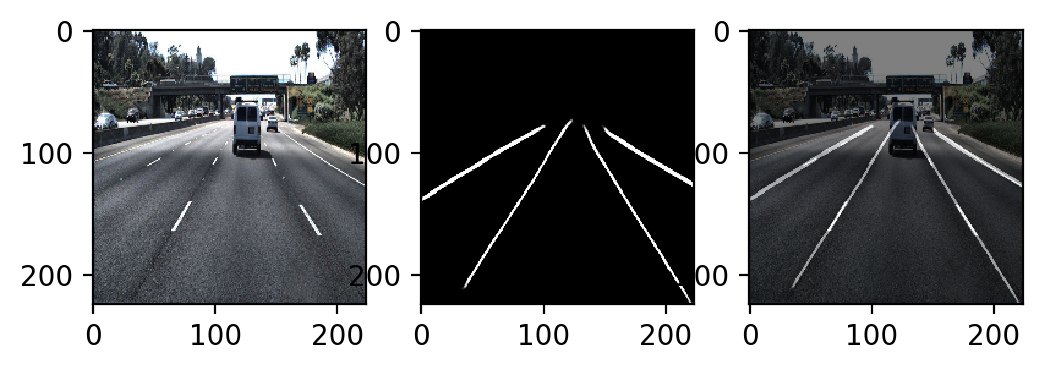

In [11]:
idx = random.randint(0,BATCH_SIZE-1)
# idx = 19

test_img = np.transpose(imgs[idx].cpu().numpy(), (1,2,0))
test_label = softmaxed_tensor[idx][1].detach().cpu().numpy()
test_label = cv2.cvtColor(test_label, cv2.COLOR_GRAY2BGR)
transformed_img = cv2.addWeighted(test_img, 0.5, test_label, 0.5, 0)

plt.figure(dpi=200)
plt.subplot(131);plt.imshow(test_img)
plt.subplot(132);plt.imshow(test_label)
plt.subplot(133);plt.imshow(transformed_img)